First of all, create a conda environment. Then install necessary libraries and packages

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.7 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/12.9 MB 1.7 MB/s eta 0:00:08
   --- --------------

Import necessary libs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

EDA PART

Load dataset in pandas dataframe and look over the dataset condition.

In [4]:
d = pd.read_csv("D:/sparkTechProject/airbnb.csv")


In [5]:
d.head(3)


,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm


In [6]:
print("Shape:", d.shape)
print("Columns:", d.columns.tolist())
print(d.dtypes)
print(d.info())
print(d.info())

Shape: (12805, 23)
Columns: ['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id', 'address', 'features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios', 'checkin', 'checkout']
Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  

1.Visualizing the distribution helps identify skewness, outliers, or non-normal behavior in the target variable.


2.It informs whether transformations (e.g., log scaling) are necessary before modeling.


3.It also provides insight into the pricing trends.


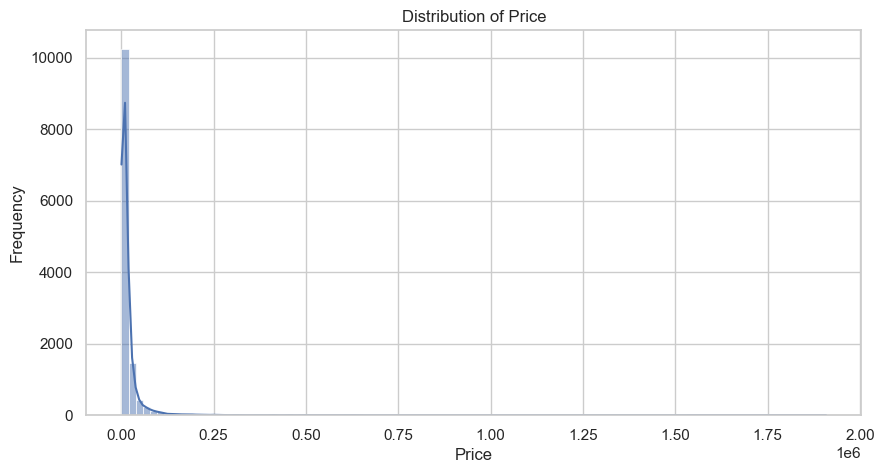

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
sns.histplot(d['price'], bins=100, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


1.Prices are often right-skewed.


2.This plot likely motivated the later decision to apply a log transformation to the price variable to stabilize variance and improve model performance.

A new column log_price was created by applying a logarithmic transformation to the original price column using np.log1p()

The original price distribution was highly right-skewed, as seen in the previous plot.

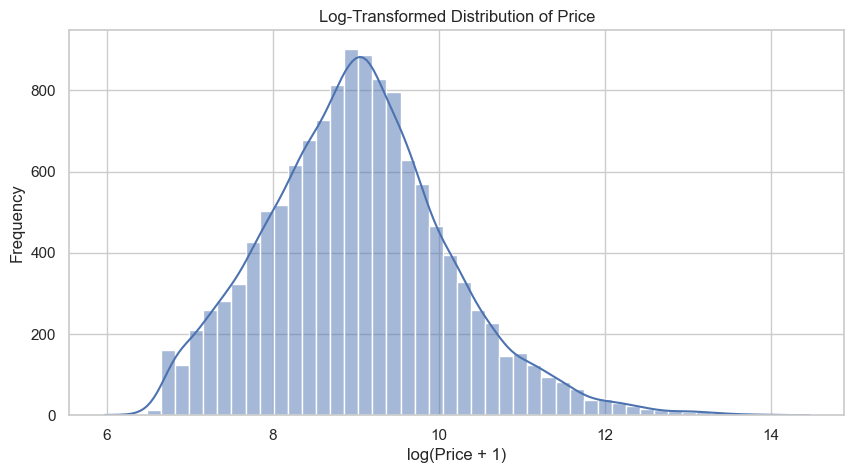

In [ ]:
d['log_price'] = np.log1p(d['price']) 

plt.figure(figsize=(10, 5))
sns.histplot(d['log_price'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Price')
plt.xlabel('log(Price + 1)')
plt.ylabel('Frequency')
plt.show()


The new distribution (log_price) appears more symmetric and bell-shaped.

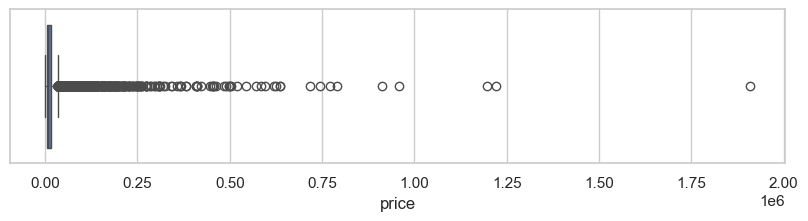

In [9]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=d['price'])
plt.show()


visually inspect the distributions of key numerical features in the dataset. This helps detect issues like skewness, outliers, and potential data entry anomalies.

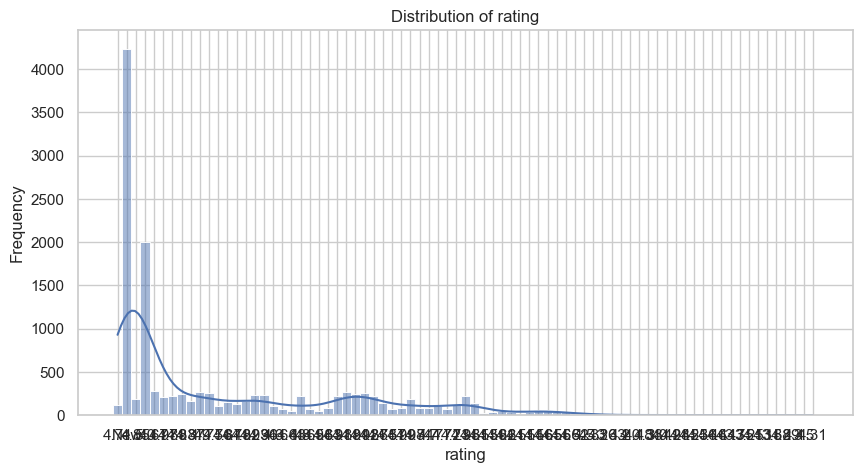

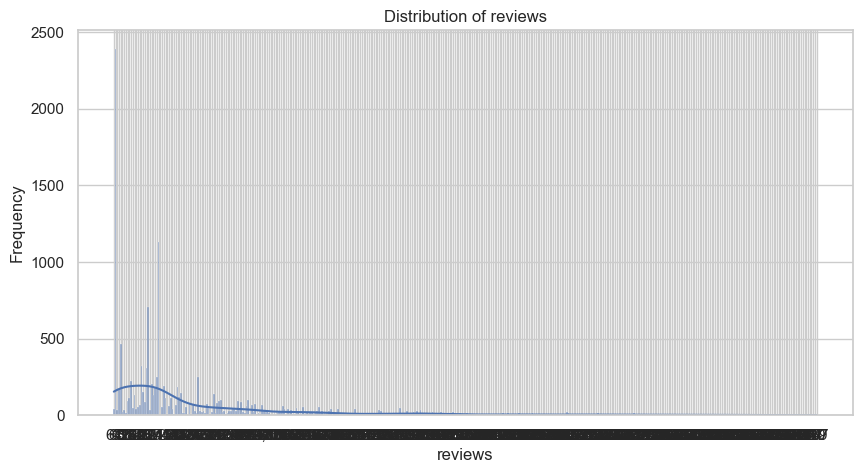

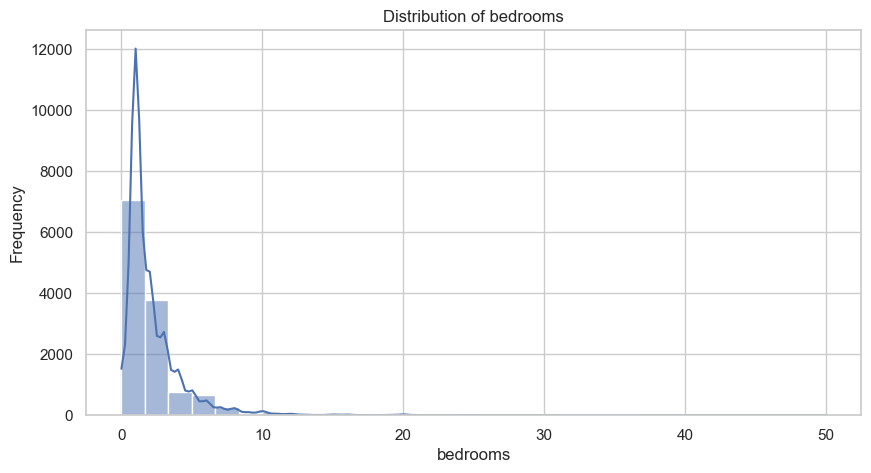

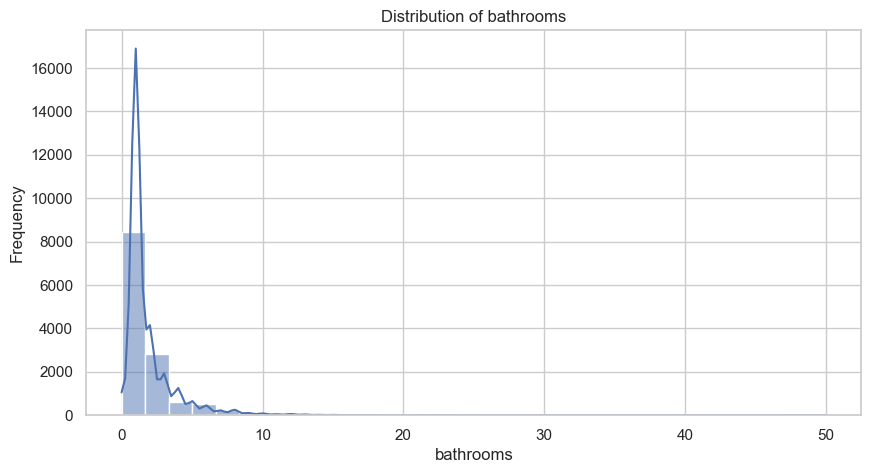

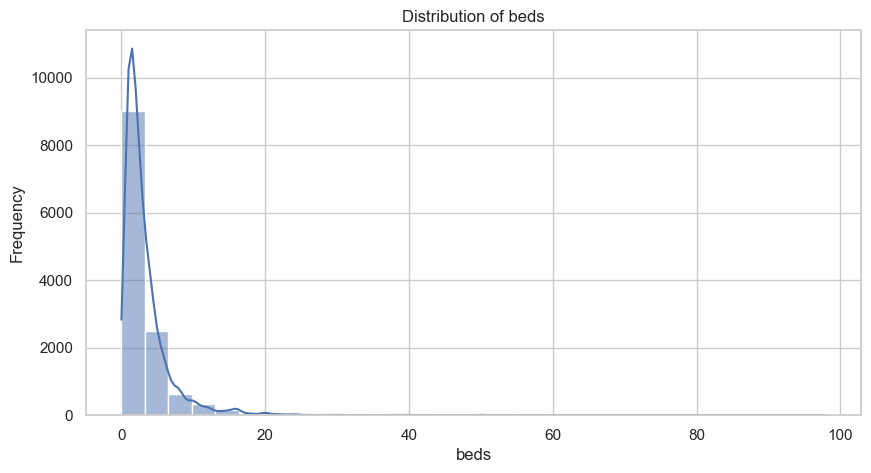

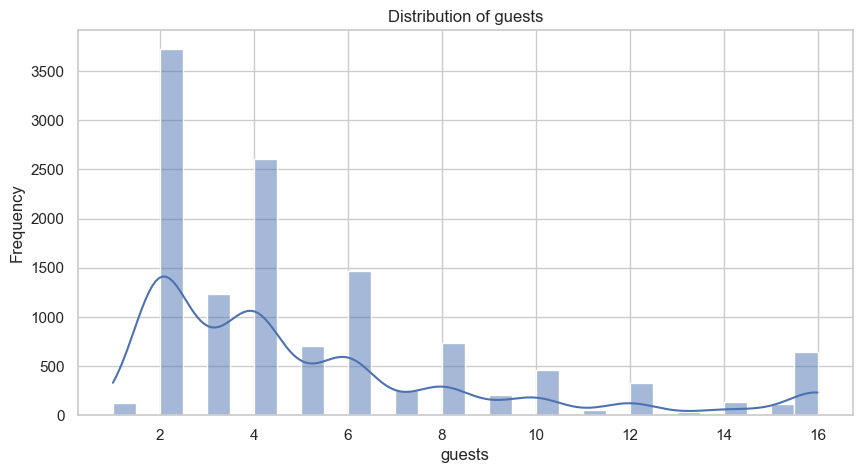

In [10]:
numeric_cols = ['rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(d[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


calculate correlation to see heatmap with necessary columns

In [11]:
num_cols = ['price', 'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']

d[num_cols] = d[num_cols].apply(pd.to_numeric, errors='coerce')


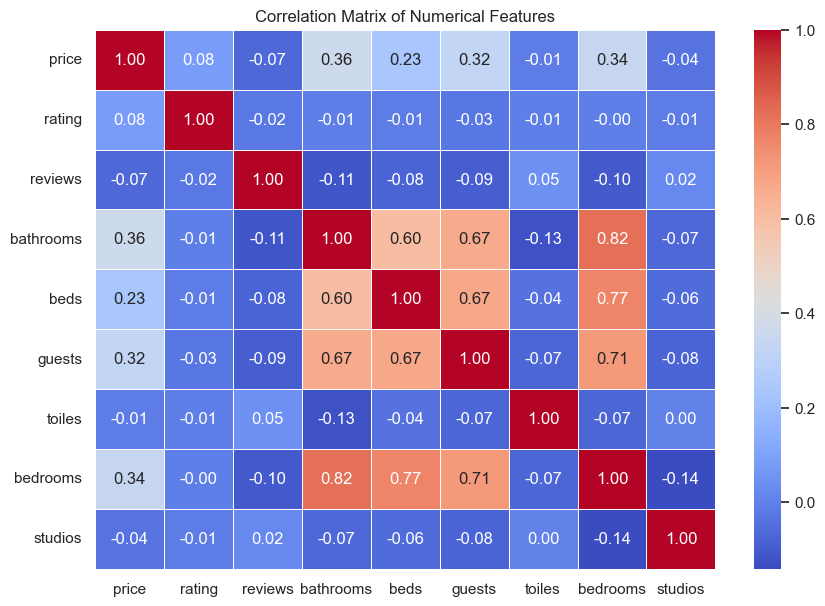

In [12]:
corr_matrix = d[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The heatmap will show the correlation between features. Later it will help to decide important feature for train regression model.

visualize the distribution of listings across different countries to understand geographical concentration in the dataset. This helps identify whether the data is biased toward certain regions or if it's uniformly distributed.


To explore host-related patterns, we identify the top 10 hosts with the most listings. This highlights any dominant hosts who may influence pricing or availability trends.


Although 'bedrooms' is a numeric variable, it behaves like a categorical feature (e.g., 1-bedroom, 2-bedroom). Using a count plot, we check its distribution to see the most common listing types.


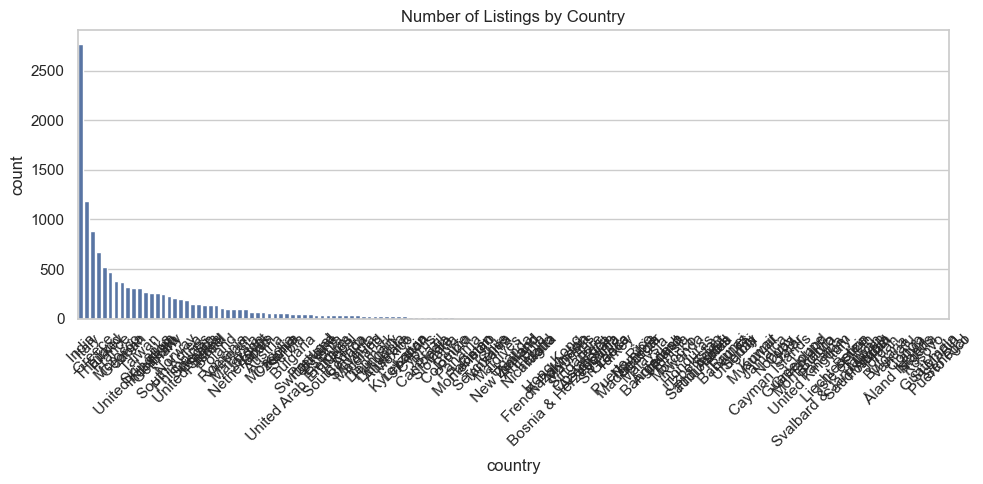

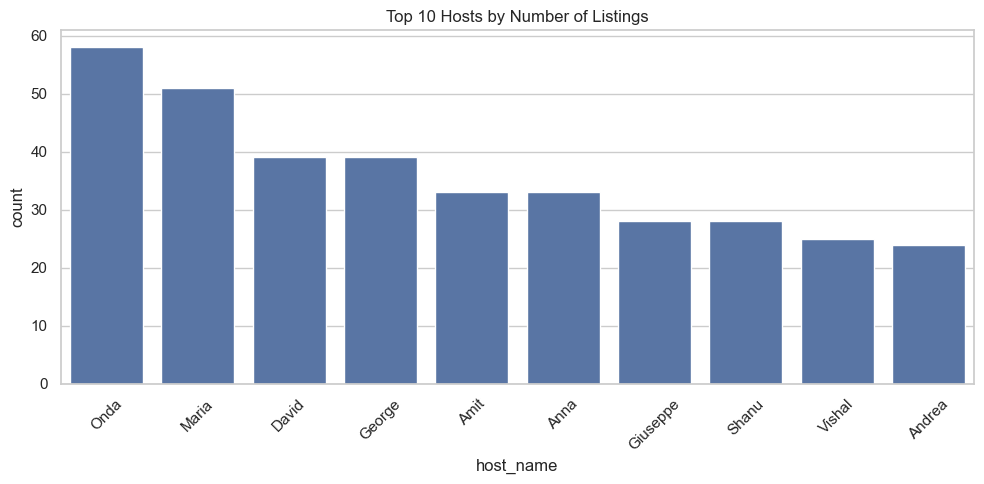

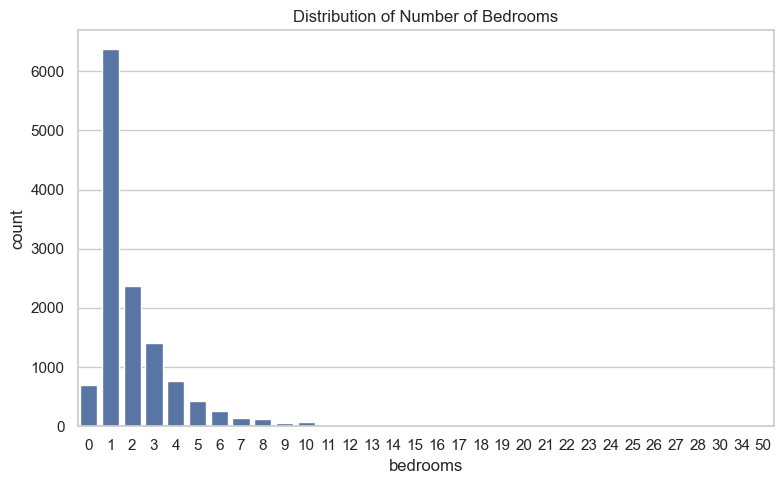

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'country'
plt.figure(figsize=(10, 5))
sns.countplot(data=d, x='country', order=d['country'].value_counts().index)
plt.title('Number of Listings by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 hosts by listing count
top_hosts = d['host_name'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
sns.countplot(data=d[d['host_name'].isin(top_hosts)], x='host_name', order=top_hosts)
plt.title('Top 10 Hosts by Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of 'bedrooms' as it's technically numeric but categorical in meaning
plt.figure(figsize=(8, 5))
sns.countplot(data=d, x='bedrooms')
plt.title('Distribution of Number of Bedrooms')
plt.tight_layout()
plt.show()


To analyze how pricing varies across countries, we use a boxplot of `price` against `country`. This helps identify regional pricing patterns, detect outliers, and understand median price differences between countries. Such insights are important for location-based pricing strategies.


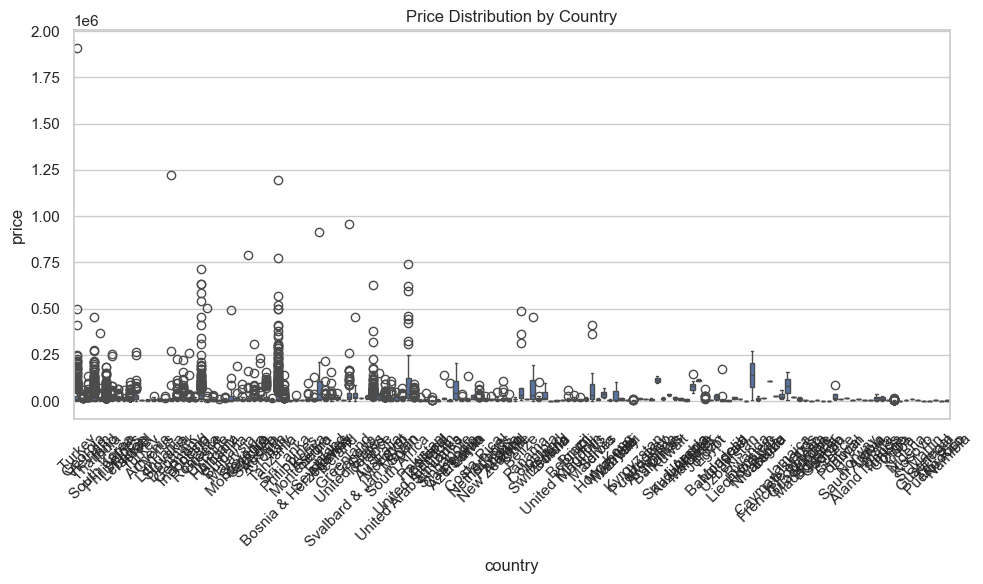

In [14]:
# country vs price

plt.figure(figsize=(10, 6))
sns.boxplot(data=d, x='country', y='price')
plt.title('Price Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This boxplot shows how listing prices vary with the number of bedrooms. It helps us observe trends such as whether more bedrooms generally lead to higher prices, and also highlights outliers or inconsistent pricing patterns. This insight is useful for modeling the relationship between space and price.


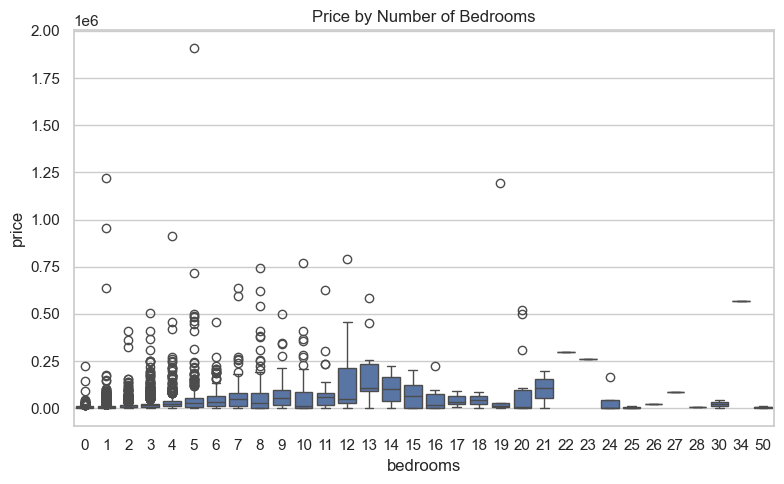

In [15]:
# bedrooms vs price

plt.figure(figsize=(8, 5))
sns.boxplot(data=d, x='bedrooms', y='price')
plt.title('Price by Number of Bedrooms')
plt.tight_layout()
plt.show()

This boxplot visualizes the distribution of listing prices for the top 10 hosts by number of listings. It helps identify whether certain hosts tend to list higher-priced properties or maintain consistent pricing. By focusing only on top hosts, we reduce noise from infrequent hosts and highlight pricing strategies of high-volume listers.


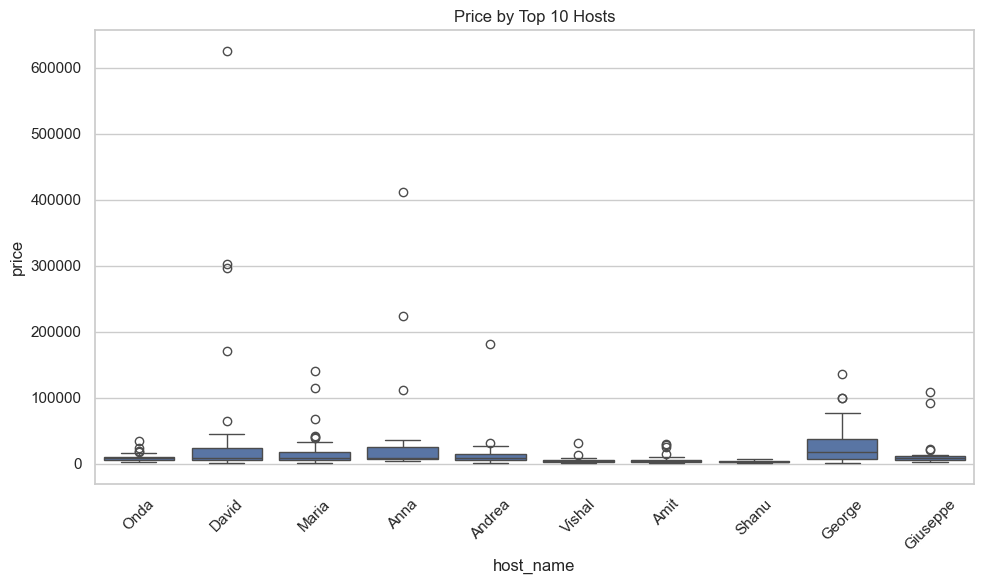

In [16]:
# hostname vs price
# Top 10 hosts by listing count

plt.figure(figsize=(10, 6))
sns.boxplot(data=d[d['host_name'].isin(top_hosts)], x='host_name', y='price')
plt.title('Price by Top 10 Hosts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

1. Which countries have higher average prices
2. Are more bedrooms always more expensive
3. Do some hosts consistently charge more than others

DATA CLEANING PART

To ensure data quality, I first examined the dataset for missing values. I calculated both the absolute number and percentage of missing entries per column. This summary allowed us to identify which features required imputation, removal, or special handling before training our machine learning models. Prioritizing features with high missing percentages helped us make informed decisions during the data cleaning phase.


In [17]:
missing_values = d.isnull().sum()
missing_percentage = (missing_values / len(d)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print(missing_df)


           Missing Values  Percentage
rating               4238   33.096447
checkout             2450   19.133151
checkin               800    6.247560
host_name               8    0.062476
reviews                 1    0.007809


After identifying missing values, I applied appropriate imputation strategies based on the data types and distribution:

- Numerical Columns:  
  - rating: Imputed with the mean.
  - reviews: Imputed with the median, which is more robust to outliers.

- Categorical Columns:  
  - host_name: Replaced missing entries with Unknown to preserve the category.
  - country: Imputed using the mode, the most frequent category.

- High-Missing Columns:  
  Columns with more than 50% missing data were dropped entirely, as their limited coverage could hinder model training more than help.

These preprocessing steps ensured a clean, consistent dataset ready for feature engineering and model training.


In [18]:
# Impute numerical columns
d['rating'] = d['rating'].fillna(d['rating'].mean())
d['reviews'] = d['reviews'].fillna(d['reviews'].median())

# Impute categorical columns
d['host_name'] = d['host_name'].fillna('Unknown')
d['country'] = d['country'].fillna(d['country'].mode()[0])

# Drop column if too many missing values (more than 50%)
threshold = 0.5
d = d.loc[:, d.isnull().mean() < threshold]


In [19]:
d.shape

(12805, 24)

In [20]:
print(d.dtypes)

Unnamed: 0        int64
id                int64
name             object
rating          float64
reviews         float64
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
log_price       float64
dtype: object


In [21]:
d.head(3)

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,log_price
0,0,49849504,Perla bungalov,4.710000,64.0,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,8.997023
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,4.857475,0.0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,8.448057
2,2,50699164,cottages sataplia,4.850000,68.0,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,8.698181


To improve model performance and reduce noise, we performed outlier detection on the price variable:

- First, we visualized the raw price distribution using a boxplot to identify extreme values.
- We applied the Interquartile Range (IQR) method to detect outliers:
  - Q1 = 25th percentile, Q3 = 75th percentile
  - IQR = Q3 - Q1
  - Outliers were defined as values falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

- All price values outside this range were removed from the dataset, as they could skew model training.

- After removal, we plotted the cleaned price distribution to confirm the data now falls within a more reasonable range.

- A total of X rows were removed, indicating significant outliers were present and successfully filtered out.

This step helped stabilize the price variable, making it more suitable for downstream modeling.


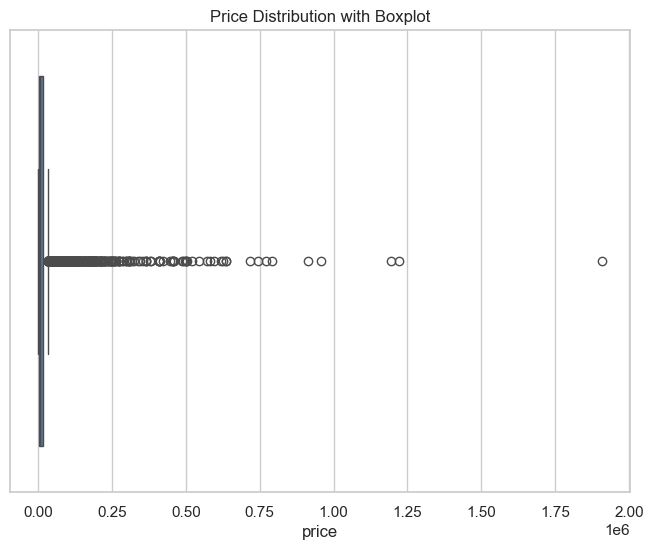

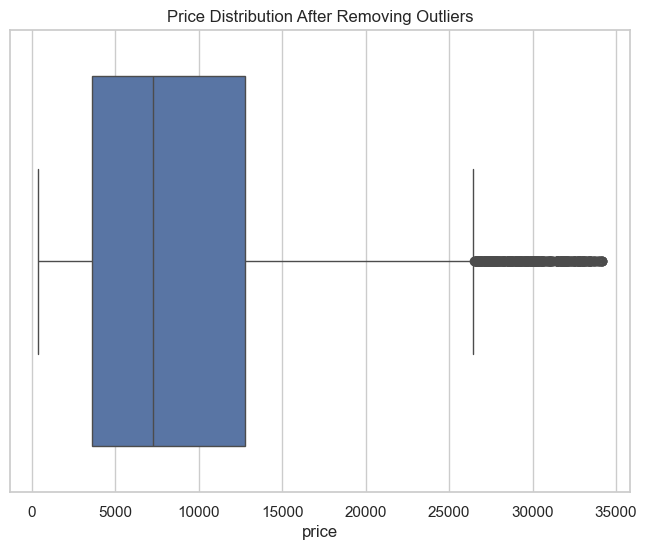

Rows removed: 1273


In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=d['price'])
plt.title('Price Distribution with Boxplot')
plt.show()


Q1 = d['price'].quantile(0.25)
Q3 = d['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


d_cleaned = d[(d['price'] >= lower_bound) & (d['price'] <= upper_bound)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=d_cleaned['price'])
plt.title('Price Distribution After Removing Outliers')
plt.show()


print(f"Rows removed: {len(d) - len(d_cleaned)}")


To eliminate noise, we performed feature selection by retaining only the most relevant columns for our modeling task. These columns were chosen based on their interpretability and potential influence on the target variable (log_price):

- rating: User rating of the listing.
- reviews: Number of reviews—an indicator of popularity.
- bathrooms, beds, bedrooms, guests: Key listing features that directly impact pricing.
- country: Geographical location of the listing, which heavily influences price.
- log_price: Log-transformed price, used as the target variable.

By keeping only these relevant features, we aimed to:
- Reduce dimensionality.
- Improve model training efficiency.
- Avoid overfitting by eliminating irrelevant or noisy columns.

This selection was applied to the cleaned dataset (d_cleaned) and used in all subsequent steps.


In [ ]:

relevant_cols = [
    'rating', 'reviews', 'bathrooms', 'beds', 'guests', 
    'bedrooms', 'country', 'log_price'
]


d_cleaned = d_cleaned[relevant_cols]

The dataset contained a categorical feature country, which represents the location of the listing. Since machine learning models generally require numerical input, we applied Label Encoding to convert this categorical column into a numeric format.

We used LabelEncoder from sklearn.preprocessing, which assigns a unique integer to each unique category in the country column. For example:
- 'USA' → 0
- 'France' → 1
- 'Italy' → 2  
...and so on.

Label Encoding was appropriate here because the country column was not ordinal in nature, but was later handled correctly by tree-based models that do not assume any order among integers.

This step ensures the model can interpret country information numerically without losing categorical context.


In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
d_cleaned['country'] = le.fit_transform(d_cleaned['country'])

In [25]:
d_cleaned.head(5)

,rating,reviews,bathrooms,beds,guests,bedrooms,country,log_price
0,4.710000,64.0,1,1,2,2,105,8.997023
1,4.857475,0.0,2,2,4,2,105,8.448057
2,4.850000,68.0,1,3,4,1,32,8.698181
3,5.000000,13.0,1,2,4,1,105,9.336092
4,4.857475,0.0,1,1,2,1,105,8.805975


MODEL CRATION PART

In [40]:
pip install torch 

  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/212.5 MB 5.6 MB/s eta 0:00:39
   ---------------------------------------- 0.8/212.5 MB 2.4 MB/s eta 0:01:29
   ---------------------------------------- 1.8/212.5 MB 3.5 MB/s eta 0:01:01
   ---------------------------------------- 2.4/212.5 MB 3.1 MB/s eta 0:01:08
    --------------------------------------- 2.9/212.5 MB 2.9 MB/s eta 0:01:12
    --------------------------------------- 3.4/212.5 MB 2.9 MB/s eta 0:01:13
 

In [26]:
print(d_cleaned.columns.tolist())

['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'bedrooms', 'country', 'log_price']


In [27]:
d_cleaned.shape

(11532, 8)

After cleaning and preprocessing the dataset, we proceeded to split the data into training, validation, and testing sets to ensure fair model evaluation and prevent overfitting.

 Splitting Strategy:
- Features (X): All columns except log_price.
- Target (y): log_price, the log-transformed price used to reduce skewness and stabilize variance.

We used train_test_split from sklearn.model_selection in a two-step process:

1. Train (70%) and Temporary (30%) Split:
   - X_train, y_train: Used to train the model.
   - X_temp, y_temp: Held out for validation and testing.

2. Validation (10%) and Test (20%) from Temporary Set:
   - 30% temporary set was split such that:
     - ⅓ became the validation set (10% total).
     - ⅔ became the test set (20% total).

This ensures a 70-10-20 split, which is a standard practice for balanced evaluation.

Tensor Conversion:
To use the data with PyTorch models, we converted all NumPy arrays to torch.tensor with float32 type, as required by most neural network layers.

DataLoader Setup:
We wrapped the tensors using TensorDataset, and then created DataLoaders with:
- batch_size = 64: For efficient training.
- shuffle=True for training: Ensures batches are different each epoch.
- shuffle=False for validation and testing: Maintains order for evaluation.

This preparation enables smooth batch-wise training and evaluation of our PyTorch regression model.


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Features and target
X = d_cleaned.drop(columns=['log_price']).values
y = d_cleaned['log_price'].values.reshape(-1, 1)

# Step 1: Train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Step 2: From temp (30%), split into val (10%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42
)
# 2/3 of 30% = 20%, remaining 1/3 = 10%

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)
y_val   = torch.tensor(y_val, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)
test_dataset  = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)



To model the log-transformed price, we implemented a flexible Artificial Neural Network (ANN) using PyTorch and performed grid search over several key hyperparameters:

 Model Architecture (ANNRegressor)
- Built with a customizable list of hidden layers.
- ReLU activations after each layer.
- Dropout applied for regularization.
- Final output layer with a single neuron (for regression).

 Hyperparameter Grid
- hidden_layers_list:  
  - [256, 128, 128, 64, 32, 16]  
  - [128, 128, 64, 64, 32, 16]  
  - [512, 256, 128, 64, 32, 16]
- dropout: [0.1, 0.2]
- learning_rate: [1e-3, 5e-4]
- batch_size: [32, 64]

This results in 24 model configurations evaluated.

 Training Strategy
- Loss Function: Mean Squared Error (MSE)
- Optimizer: Adam
- Scheduler: StepLR (decays learning rate every 50 epochs)
- Epochs: 30
- Training and validation loss computed per configuration.

 Best Configuration (Based on Validation Loss)
At the end of training, we sorted the results by validation loss to select the best-performing configuration:

python
print(best_config)


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import itertools


class ANNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_units, dropout):
        super(ANNRegressor, self).__init__()
        layers = []
        prev = input_dim
        for h in hidden_units:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev = h
        layers.append(nn.Linear(prev, 1))  
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


hidden_layers_list = [
    [256, 128, 128, 64, 32, 16],
    [128, 128, 64, 64, 32, 16],
    [512, 256, 128, 64, 32, 16]
]
dropouts = [0.1, 0.2]
learning_rates = [1e-3, 5e-4]
batch_sizes = [32, 64]

results = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


for hidden_units, dropout, lr, batch_size in itertools.product(hidden_layers_list, dropouts, learning_rates, batch_sizes):

    print(f"\nRunning model with hidden={hidden_units}, dropout={dropout}, lr={lr}, batch={batch_size}")

    
    train_data = TensorDataset(X_train, y_train)
    val_data   = TensorDataset(X_val, y_val)

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_data, batch_size=batch_size, shuffle=False)

    
    model = ANNRegressor(X_train.shape[1], hidden_units, dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
    criterion = nn.MSELoss()

    
    for epoch in range(30):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        scheduler.step()

  
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_preds = model(xb)
            val_loss += criterion(val_preds, yb).item()
    val_loss /= len(val_loader)

    print(f"Validation Loss: {val_loss:.4f}")

    
    results.append({
        'hidden_units': hidden_units,
        'dropout': dropout,
        'lr': lr,
        'batch_size': batch_size,
        'val_loss': val_loss
    })


best_config = sorted(results, key=lambda x: x['val_loss'])[0]
print("\nBest Hyperparameter Configuration:")
print(best_config)
   


Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.1, lr=0.001, batch=32
Validation Loss: 0.6265

Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.1, lr=0.001, batch=64
Validation Loss: 0.6479

Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.1, lr=0.0005, batch=32
Validation Loss: 0.7910

Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.1, lr=0.0005, batch=64
Validation Loss: 1.2570

Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.2, lr=0.001, batch=32
Validation Loss: 0.6525

Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.2, lr=0.001, batch=64
Validation Loss: 0.6972

Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.2, lr=0.0005, batch=32
Validation Loss: 0.7946

Running model with hidden=[256, 128, 128, 64, 32, 16], dropout=0.2, lr=0.0005, batch=64
Validation Loss: 0.7151

Running model with hidden=[128, 128, 64, 64, 32, 16], dropout=0.1, lr=0.001, batch=32
Validation Lo

FINALY USE BEST HYPER PARAMETERS TRAIN THE MODEL AND EVALUATE. I have use 6 Layers. I randomly choose this number.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init


# Model Definition using best hidden_units and dropout
class FinalANNRegressor(nn.Module):
    def __init__(self, input_dim):
        super(FinalANNRegressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.LayerNorm(256),
            nn.Dropout(0.1),

            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.LayerNorm(128),
            nn.Dropout(0.1),

            nn.Linear(128, 128),
            nn.LeakyReLU(0.2),
            nn.LayerNorm(128),
            nn.Dropout(0.1),

            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.LayerNorm(64),
            nn.Dropout(0.1),

            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.LayerNorm(32),
            nn.Dropout(0.1),

            nn.Linear(32, 16),
            nn.LeakyReLU(0.2),
            nn.LayerNorm(16),
            nn.Dropout(0.1),

            nn.Linear(16, 1)
        )
        self._initialize_weights()

    def forward(self, x):
        return self.net(x)

    def _initialize_weights(self):
        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.zeros_(m.bias)

Create dataloader again with batchsize 32. 

Used MSE and MAE as this is a regression task.

 Use Adam optimizer as it is very common and popular. No need to use another optimizer for this task. 
 
 Have used early stopping and patience is 30(randomly picked, maybe 10 was enough). 
 
 epoch 200(randomly choose)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = FinalANNRegressor(X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)


best_val_loss = float('inf')
patience = 30
counter = 0
num_epochs = 200


for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            val_loss += criterion(pred, yb).item()
    val_loss /= len(val_loader)

    scheduler.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break


model.load_state_dict(torch.load('best_model.pt'))
model.eval()


all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        pred = model(xb).cpu()
        all_preds.extend(pred.squeeze().numpy())
        all_targets.extend(yb.squeeze().numpy())


all_preds = np.array(all_preds)
all_targets = np.array(all_targets)


mse = mean_squared_error(all_targets, all_preds)
mae = mean_absolute_error(all_targets, all_preds)
rmse = np.sqrt(mse)

print(f"Test Results:")
print(f"MSE  = {mse:.4f}")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")


Epoch 0: Train Loss = 7.0591, Val Loss = 0.7180
Epoch 10: Train Loss = 1.1906, Val Loss = 0.6596
Epoch 20: Train Loss = 1.1655, Val Loss = 0.6626
Epoch 30: Train Loss = 1.0500, Val Loss = 0.6513
Epoch 40: Train Loss = 0.9853, Val Loss = 0.6362
Epoch 50: Train Loss = 0.9237, Val Loss = 0.6253
Epoch 60: Train Loss = 0.9017, Val Loss = 0.6206
Epoch 70: Train Loss = 0.8896, Val Loss = 0.6233
Epoch 80: Train Loss = 0.8782, Val Loss = 0.6214
Epoch 90: Train Loss = 0.8578, Val Loss = 0.6217
Epoch 100: Train Loss = 0.8633, Val Loss = 0.6205
Epoch 110: Train Loss = 0.8625, Val Loss = 0.6202
Epoch 120: Train Loss = 0.8685, Val Loss = 0.6191
Early stopping at epoch 124
Test Results:
MSE  = 0.6576
MAE  = 0.6596
RMSE = 0.8109


K-FOLD CROSS VALIDATION

To robustly evaluate the final ANN model's performance, we used 5-fold cross-validation. This helps ensure the model generalizes well across different subsets of the dataset.

Cross-Validation Setup:
- K-Folds: 5
- Batch Size: 64
- Epochs: 30
- Loss Function: Mean Squared Error (MSE)
- Optimizer: Adam (lr=0.001)
- Device: CUDA (if available)

Model Used:
- FinalANNRegressor(input_dim=X.shape[1])  
  *(Make sure this model is defined with the best architecture from earlier tuning)*

Results:
Each fold is trained and evaluated independently. At the end, we print validation losses per fold and compute the average validation loss to summarize performance.




In [ ]:

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import torch.optim as optim
import torch.nn as nn
import numpy as np


X = d_cleaned.drop(columns=['log_price']).values
y = d_cleaned['log_price'].values.reshape(-1, 1)


X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

val_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\nFold {fold + 1}/{k}")
    
    
    X_train, y_train = X_tensor[train_idx], y_tensor[train_idx]
    X_val, y_val = X_tensor[val_idx], y_tensor[val_idx]

   
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    
    model = FinalANNRegressor(X.shape[1]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

   
    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item() * X_batch.size(0)

    avg_val_loss = total_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    print(f"Validation Loss for fold {fold + 1}: {avg_val_loss:.4f}")


print("\n10-Fold Cross-validation Results:")
for i, l in enumerate(val_losses):
    print(f"Fold {i+1}: Loss = {l:.4f}")
print(f"Average Validation Loss: {np.mean(val_losses):.4f}")




Fold 1/5
Validation Loss for fold 1: 0.7035

Fold 2/5
Validation Loss for fold 2: 0.6885

Fold 3/5
Validation Loss for fold 3: 0.6731

Fold 4/5
Validation Loss for fold 4: 0.6753

Fold 5/5
Validation Loss for fold 5: 0.6797

10-Fold Cross-validation Results:
Fold 1: Loss = 0.7035
Fold 2: Loss = 0.6885
Fold 3: Loss = 0.6731
Fold 4: Loss = 0.6753
Fold 5: Loss = 0.6797
Average Validation Loss: 0.6840
